# Prepare the environments for this set of experiments

In [4]:
import sys
sys.path.append('../../')
from panav.environment.env import Room, MultiTunnelEnv, WareHouse
from panav.viz import draw_env

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

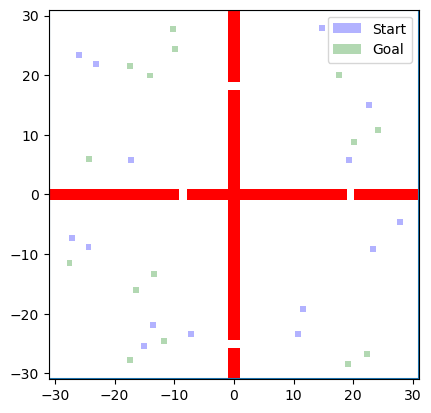

In [2]:
from matplotlib import pyplot as plt
# Room Simplified
n_agents = list(range(1,41,10))
bloating_r = 0.5

# specs = {'n_col': 3, 
#         'n_row' : 3, 
#         'cell_width':15,
#         'cell_height':15,
#         'gap_width':3.9*bloating_r,
#         'start_goal_dist':30}

specs = dict(n_col = 2, 
        n_row= 2, 
        cell_width=30,
        cell_height=30,
        gap_width=2.5*bloating_r,
        start_goal_dist=50)

env = Room(**specs, N_agent=15)
draw_env(env,obs_alpha=1.0)

env_info = {'specs':specs,'constructor':Room}
env_name = 'Room'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

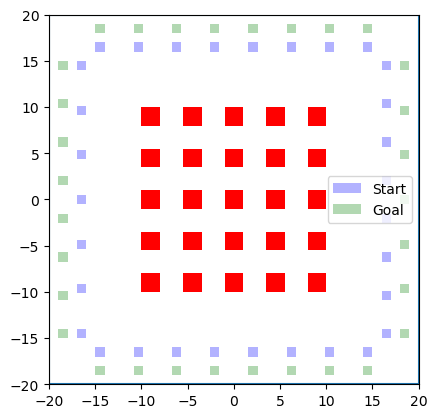

In [5]:
# Warehouse Simplified
n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]

bloating_r = 0.5

specs = dict(limits = limits, 
                shelf_region_x_limit=[-10,10], 
                shelf_region_y_limit=[-10,10],
                obs_x_margin = 5.0 * bloating_r,
                obs_y_margin = 5.0 * bloating_r,
                n_col = 5, n_row = 5 , 

                corner_padding_x=5,corner_padding_y=5,
                tunnel_endpoint_buffer = 0.05)

env = WareHouse(**specs,
                N_agent = max(n_agents))

draw_env(env,obs_alpha=1.0)


env_info = {'specs':specs,'constructor':WareHouse}
env_name = 'Warehouse'

with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

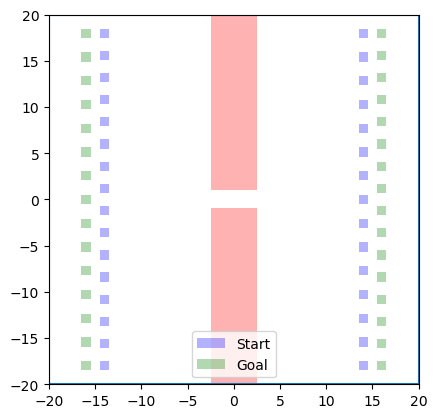

In [17]:
# Single Tunnel
bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 1

env = MultiTunnelEnv(n_tunnel = n_tunnel, 
                     tunnel_width = bloating_r*3.9,
                     limits=limits, 
                     N_agent = max(n_agents))

specs = dict(n_tunnel = n_tunnel, 
        tunnel_width = bloating_r*3.9,
        limits=limits)

draw_env(env)

env_info = {'specs':specs,'constructor':MultiTunnelEnv}
env_name = 'SingleTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

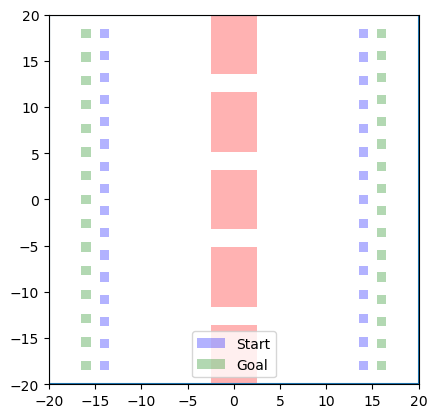

In [18]:
# Multi Tunnel
bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 4

env = MultiTunnelEnv(n_tunnel = n_tunnel, 
                     tunnel_width = bloating_r*3.9,
                     limits=limits, 
                     N_agent = max(n_agents))
draw_env(env)

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits)

env_info = {'specs':specs,'constructor':MultiTunnelEnv}
env_name = 'MultiTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)